# Vizualise individual models from the sea level projections

- Read annual dynamic sea level from CMIP5 as computed for Erwin's project
- Add the mean value of other sea level contributors
- Compare the result with observations from the 6 tide gauges of the ZSM

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/dewilebars/Projects/SLBudget/code/')
import SeaLevelContrib as slc

/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_path = '../../Data_Proj/Data_CMIP5/CorrectedZOS_TS_yearly/'

In [7]:
#List of model names
# Removed "MPI-ESM-LR" and "MPI-ESM-MR" because of strange results
sce = 'rcp85'

if sce == 'rcp45':
    MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0",
           "GFDL-ESM2G","GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES",
           "inmcm4","IPSL-CM5A-LR", "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM",
           "MIROC-ESM","MRI-CGCM3","NorESM1-ME","NorESM1-M"]
elif sce == 'rcp85':
     MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CSIRO-Mk3-6-0",
           "GFDL-ESM2G","GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES",
           "inmcm4","IPSL-CM5A-LR", "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM",
           "MIROC-ESM","MRI-CGCM3","NorESM1-ME","NorESM1-M"]   

ref_period = [1986,2005]
area = 'dutch_coast'
if area == 'dutch_coast':
    lon_min, lon_max = 3, 7
    lat_min, lat_max = 51, 54
elif area == 'north_sea':
    lon_min, lon_max = -2, 9
    lat_min, lat_max = 48, 60


In [8]:
def rotate_longitude(ds):
    ds = ds.roll(longitude=180, roll_coords=True)
    ds['longitude'] = np.where(ds['longitude']>180, ds['longitude']-360, ds['longitude'])
    return ds

In [9]:
odyn_df = pd.DataFrame(dict(time=np.arange(1950,2101)))
odyn_df = odyn_df.set_index('time')
for mod in MOD:
    with xr.open_dataset(data_path+'ZOS_HIST/CorrectedZOS_EXPrcp85_'+mod+'.nc') as ds:
        ds = rotate_longitude(ds)
        ds = ds.sel(time=slice(1950,2005), longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        odyn = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    with xr.open_dataset(data_path+'ZOS_'+sce.upper()+'/CorrectedZOS_EXP'+sce+'_'+mod+'.nc') as ds:
        ds = rotate_longitude(ds)
        ds = ds.sel(longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max))
        odyn_sce = ds['CorrectedZOS_reg'].mean(dim=['longitude','latitude'])
    odyn_df[mod] = xr.concat([odyn, odyn_sce],dim='time').to_dataframe()
    odyn_df[mod] = odyn_df[mod] - odyn_df[mod].loc[ref_period[0]:ref_period[1]].mean()
odyn_df['mean'] = odyn_df.mean(axis=1)
odyn_df.iloc[-10:]

,ACCESS1-0,BCC-CSM1-1,CanESM2,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,HadGEM2-ES,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC5,MIROC-ESM-CHEM,MIROC-ESM,MRI-CGCM3,NorESM1-ME,NorESM1-M,mean
time,,,,,,,,,,,,,,,,,,,
2091,15.572315,24.458958,-0.102904,6.909520,12.908358,10.382683,6.035875,12.338784,25.091446,20.736584,30.778399,25.309748,24.324713,26.024002,20.193272,15.326360,-1.719167,0.761701,15.296144
2092,21.178617,17.031618,0.731860,11.890850,11.148284,5.994293,2.491017,14.898087,21.263952,17.633171,23.857794,23.860275,25.811159,24.118471,21.470108,13.910945,0.538276,-2.320386,14.194910
2093,38.143635,10.091387,2.088260,14.967196,16.625841,8.329321,4.061490,17.556784,19.853151,14.320494,23.134298,23.368599,25.350285,23.882866,21.663139,16.901615,0.354567,-2.765058,15.440438
2094,29.910686,11.452415,3.004406,8.498766,13.429030,5.004364,5.002424,20.498730,25.841469,19.071493,24.266592,22.931038,23.938623,23.311180,21.560562,10.494689,-0.738890,-1.279316,14.788792
2095,38.197113,14.871355,2.581376,7.527484,16.941652,5.092246,2.676787,14.164181,20.938185,21.056774,29.174120,22.431131,26.784491,23.923855,22.229067,17.872646,-3.471683,-4.946102,15.446926
2096,34.332558,23.110243,-0.398684,6.731658,16.731537,8.110168,0.380667,15.855476,21.064045,18.209980,29.066908,24.597517,25.615644,24.840418,20.707535,11.556277,2.539068,-2.124214,15.607045
2097,33.398460,17.034580,0.243594,7.971465,16.302851,7.202234,5.351453,20.567440,24.115248,14.655032,26.577976,24.085094,26.096148,27.363314,19.178322,20.095522,-3.360790,-1.671185,15.844822
2098,28.601433,14.978611,0.922480,6.890568,13.339099,8.245181,1.843183,18.521290,24.423275,15.872104,28.624815,26.433884,27.547564,26.395618,21.911674,19.830713,-6.351035,-3.186649,15.269102
2099,37.327511,22.912279,1.406564,5.328540,13.604314,9.033796,8.080552,18.083532,0.037263,14.084723,31.712292,22.236654,31.498381,23.242258,20.872517,14.565268,-6.821888,-5.241736,14.553489


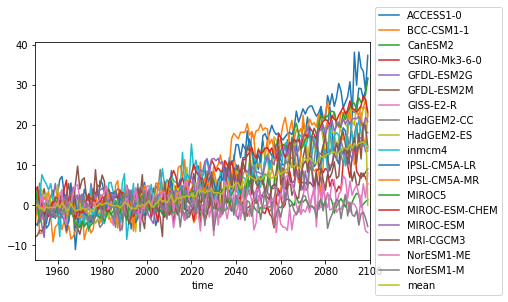

In [10]:
odyn_df.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

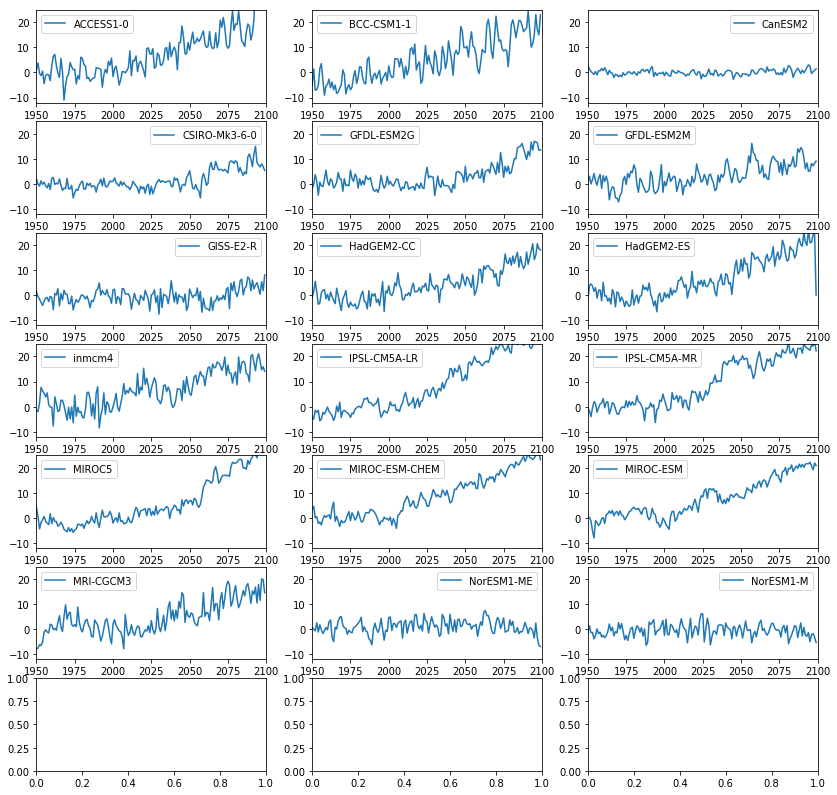

In [11]:
# Split time series in small groups
nb_cols = 3
nb_rows = int(len(MOD)/nb_cols)+1
fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,14))
#axes.set_ylim([-12,25])

for idx, mod in enumerate(MOD):
    odyn_df[mod].plot(ax=axes[int(idx/nb_cols),idx%nb_cols], legend=True, ylim=[-12,25])


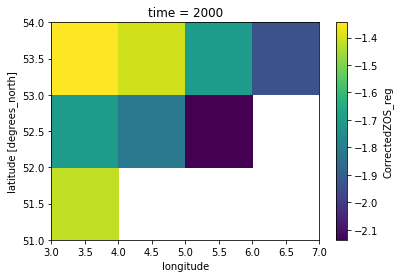

In [12]:
# Check the area
f = xr.open_dataset(data_path+'ZOS_HIST/CorrectedZOS_EXPrcp85_'+MOD[0]+'.nc')
f = f.roll(longitude=180, roll_coords=True)
f['longitude'] = np.where(f['longitude']>180, f['longitude']-360, f['longitude'])
f.CorrectedZOS_reg.sel(time=2000, longitude=slice(lon_min,lon_max), latitude=slice(lat_min,lat_max)).plot()

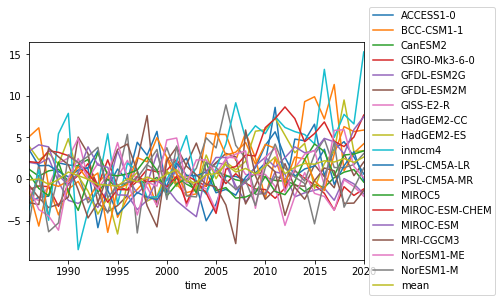

In [13]:
odyn_df.loc[1986:2020].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
# Read KNMI'14 projections
path_KNMI14 = '/Users/dewilebars/Projects/Project_ProbSLR/KNMI14/'
KNMI14_df = pd.read_csv(path_KNMI14 + 'K14_scenarios_by_year.csv')
del(KNMI14_df['year.1'])
KNMI14_df = KNMI14_df.set_index('year')

# Add subidence
subsidence = np.arange(KNMI14_df.shape[0]) * 0.045

for i in KNMI14_df.columns:
    KNMI14_df[i + '_sub'] = KNMI14_df[i] + subsidence

# Compute medians (approximatively)
KNMI14_df['low_50_sub'] = (KNMI14_df['low_05_sub'] + KNMI14_df['low_95_sub'])/2
KNMI14_df['high_50_sub'] = (KNMI14_df['high_05_sub'] + KNMI14_df['high_95_sub'])/2
    
KNMI14_df.index.names = ['time']
KNMI14_df[:10]

,low_05,low_95,high_05,high_95,low_05_sub,low_95_sub,high_05_sub,high_95_sub,low_50_sub,high_50_sub
time,,,,,,,,,,
1995,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990,-0.2826,0.3990,0.05820,0.05820
1996,0.1787,0.7226,0.1814,0.7251,0.2237,0.7676,0.2264,0.7701,0.49565,0.49825
1997,0.3832,1.3960,0.5654,1.5800,0.4732,1.4860,0.6554,1.6700,0.97960,1.16270
1998,0.5978,1.6610,0.9111,1.9760,0.7328,1.7960,1.0461,2.1110,1.26440,1.57855
1999,0.6499,2.0520,1.2050,2.6090,0.8299,2.2320,1.3850,2.7890,1.53095,2.08700
2000,0.7580,2.6900,1.5490,3.4850,0.9830,2.9150,1.7740,3.7100,1.94900,2.74200
2001,0.8874,3.1510,1.6750,3.9430,1.1574,3.4210,1.9450,4.2130,2.28920,3.07900
2002,1.0880,3.6320,1.8020,4.3510,1.4030,3.9470,2.1170,4.6660,2.67500,3.39150
2003,1.3860,4.0530,2.0380,4.7080,1.7460,4.4130,2.3980,5.0680,3.07950,3.73300


In [17]:
KNMI14_indiv_model_df = pd.DataFrame()
for mod in odyn_df.columns:
    KNMI14_indiv_model_df[mod] = odyn_df[mod] + KNMI14_df['high_50_sub'] - odyn_df['mean']
KNMI14_indiv_model_df = KNMI14_indiv_model_df.rename(columns={'mean':'KNMI_high_50_sub'})
KNMI14_indiv_model_df.iloc[-10:]

,ACCESS1-0,BCC-CSM1-1,CanESM2,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,HadGEM2-ES,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC5,MIROC-ESM-CHEM,MIROC-ESM,MRI-CGCM3,NorESM1-ME,NorESM1-M,KNMI_high_50_sub
time,,,,,,,,,,,,,,,,,,,
2091,71.131171,80.017813,55.455951,62.468376,68.467213,65.941538,61.594730,67.897640,80.650301,76.295439,86.337254,80.868603,79.883568,81.582858,75.752127,70.885215,53.839688,56.320557,70.855
2092,78.698707,74.551708,58.251950,69.410940,68.668374,63.514383,60.011107,72.418176,78.784042,75.153261,81.377884,81.380365,83.331249,81.638561,78.990198,71.431035,58.058366,55.199704,71.715
2093,95.368197,67.315949,59.312822,72.191758,73.850403,65.553883,61.286051,74.781345,77.077713,71.545055,80.358860,80.593161,82.574846,81.107428,78.887701,74.126177,57.579128,54.459503,72.665
2094,88.736895,70.278624,61.830614,67.324974,72.255239,63.830572,63.828633,79.324938,84.667677,77.897701,83.092800,81.757246,82.764832,82.137388,80.386770,69.320897,58.087318,57.546892,73.615
2095,97.290187,73.964429,61.674449,66.620558,76.034726,64.185320,61.769861,73.257255,80.031259,80.149848,88.267194,81.524205,85.877564,83.016929,81.322141,76.965720,55.621391,54.146972,74.540
2096,94.270513,83.048198,59.539271,66.669613,76.669492,68.048123,60.318622,75.793431,81.002000,78.147935,89.004863,84.535472,85.553599,84.778373,80.645490,71.494232,62.477022,57.813740,75.545
2097,93.818638,77.454758,60.663772,68.391643,76.723029,67.622412,65.771631,80.987618,84.535426,75.075210,86.998154,84.505273,86.516326,87.783492,79.598500,80.515700,57.059389,58.748993,76.265
2098,90.482331,76.859509,62.803378,68.771466,75.219997,70.126079,63.724081,80.402188,86.304173,77.753002,90.505713,88.314782,89.428461,88.276516,83.792572,81.711611,55.529863,58.694249,77.150
2099,100.574022,86.158790,64.653076,68.575052,76.850825,72.280308,71.327063,81.330044,63.283775,77.331235,94.958803,85.483166,94.744892,86.488769,84.119028,77.811779,56.424623,58.004775,77.800


In [46]:
# Read tide gauge data
tg_id = [20, 22, 23, 24, 25, 32]
tg_df = slc.tide_gauge_obs(tg_id, interp=True)
tg_df.iloc[-10:]

,20,22,23,24,25,32,Average
time,,,,,,,
2009,12.172611,14.848387,8.513636,10.288312,7.905195,9.902721,10.605144
2010,12.372611,15.748387,7.213636,8.888312,5.705195,8.702721,9.771810
2011,12.772611,16.348387,11.913636,14.388312,12.305195,11.802721,13.255144
2012,12.072611,16.348387,10.413636,12.788312,11.005195,11.202721,12.305144
2013,10.672611,14.748387,7.513636,10.388312,6.705195,8.802721,9.805144
2014,14.472611,17.848387,10.813636,14.788312,12.005195,13.502721,13.905144
2015,14.772611,18.648387,13.813636,20.088312,16.705195,14.902721,16.488477
2016,15.072611,18.848387,11.913636,16.588312,13.005195,14.202721,14.938477
2017,16.672611,21.048387,15.813636,22.388312,17.605195,17.202721,18.455144


In [47]:
KNMI14_indiv_model_df['TG_mean'] = tg_df.Average - tg_df.Average.loc[ref_period[0]:ref_period[1]].mean()

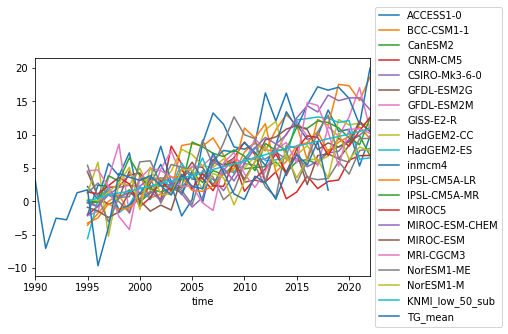

In [48]:
KNMI14_indiv_model_df.loc[1990:2022].plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

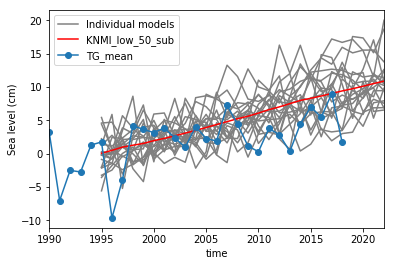

In [49]:
len_col = len(KNMI14_indiv_model_df.columns)
styles = list()
for i in range(len_col):
    styles.append('grey')

styles[-2] = 'r-'
styles[-1] = 'o-'
ax = KNMI14_indiv_model_df.loc[1990:2022].plot(style = styles)
ax.set_ylabel('Sea level (cm)')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lines, labels = ax.get_legend_handles_labels()
labels[-3] = 'Individual models'
ax.legend(lines[-3:], labels[-3:])
plt.savefig('../figures/ComparisonTGvsProjectionsWithIndividualModels_low.pdf', dpi=150)

In [50]:
# Export data
#KNMI14_indiv_model_df.loc[1990:].to_csv('../outputs/KNMI14_individual_model_time_series_high.csv')

In [18]:
odyn_df

,ACCESS1-0,BCC-CSM1-1,CanESM2,CSIRO-Mk3-6-0,GFDL-ESM2G,GFDL-ESM2M,GISS-E2-R,HadGEM2-CC,HadGEM2-ES,inmcm4,IPSL-CM5A-LR,IPSL-CM5A-MR,MIROC5,MIROC-ESM-CHEM,MIROC-ESM,MRI-CGCM3,NorESM1-ME,NorESM1-M,mean
time,,,,,,,,,,,,,,,,,,,
1950,1.154666,-5.086757,2.865411,1.935063,-1.843333,1.051609,1.405449,-0.999133,-1.643259,-1.312990,-4.374213,-0.608118,4.085287,3.508523,-0.194612,-7.843311,0.608276,-1.456616,-0.486003
1951,3.821113,1.406646,1.333973,-0.067270,-0.133075,3.018568,-0.538409,1.577271,3.742884,-1.955274,-5.017851,-1.699782,0.598887,4.628684,0.252684,-7.488479,0.153023,1.380585,0.278565
1952,-0.401054,-7.060221,0.397187,-0.883102,3.678635,-0.034030,-1.518738,5.546354,4.496700,1.398322,-1.513973,-4.030810,-4.339739,0.043141,-1.227463,-6.156790,-0.611773,-1.297539,-0.750827
1953,-1.205285,-6.882765,-0.172946,1.176888,1.017626,1.629249,-2.867198,1.262969,3.695244,7.671761,-2.304648,-0.527071,-1.872834,0.517795,-5.058046,-6.438322,2.611267,-1.266311,-0.500702
1954,0.591543,-5.184721,-0.788111,-0.184426,-4.532802,4.139679,-4.091973,-3.622796,1.532126,6.229501,-1.438500,1.967184,-0.647909,-2.180780,-7.971843,-5.174786,-1.092698,-3.809668,-1.458943
1955,-4.487816,1.564896,0.394119,0.633909,0.686697,1.159990,-2.417895,-3.171966,3.016868,5.275540,-5.694838,1.243264,0.559150,-1.664615,-1.006283,-1.077644,1.811315,-2.443708,-0.312168
1956,-1.248715,3.581663,-0.991507,-0.774283,-0.859946,-0.551136,-1.120964,1.022381,-1.181237,3.872775,-4.952126,-2.241214,-1.422755,-2.787896,-1.891510,-0.181810,-0.211279,0.194414,-0.652508
1957,-0.754155,-3.127515,0.699589,-1.575540,-1.083877,2.253521,-0.908172,1.929082,1.970778,5.418544,-2.346584,-0.430870,-2.054531,-0.450872,-3.054584,-1.034449,-1.664740,-1.755225,-0.442756
1958,-0.938245,-9.059547,0.628484,0.144730,1.847093,3.773072,-2.513963,2.272743,2.051968,0.787938,-2.979962,1.056700,-2.637267,0.932084,-2.226552,-1.433995,-0.537725,-1.134205,-0.553703
